# Reading FC Scouting

Analysing potential Reading FC player targets.

Areas of concern:

- Left Back
- Centre Back
- CDM
- Wingers
- Striker

The following analysis will include performace of potential targets and various comparisons against already existinf Reading FC players. There is scope to perform this analysis on a wide range of players across the leagues.

# Creating position benchmarks

- To have a chance of promotion you need to be in the top 6. So taking players from the top 6 (last 3 seasons), I create a benchmark per position to see what we need from potential signings in their position.
- I.e, Top 6 Striker benchmark based over the last 3 seasons is 12 goals in the season.

In [5]:
import pandas as pd

# Importing the Top 6 players dataset

df = pd.read_csv('TopPerformers.csv')
df.head()




,Name,Age,Rating,Market_Value,Season,League,Club,League_Position,Appearances,Position_Region,...,Pass_Percentage,Dribbles,Tackles,Interceptions,Fouls,Clearances,Blocks,Play_Style,Strengths,Weaknesses
0,Christoph Klarer,24,7.27,3500000,24/25,League one,Birmingham,1,43,Defender,...,88.00,0.30,1.80,0.60,1.10,5.60,0.50,"Short passing, Commits fouls often","Passing, Tackling, Concentration",NaN
1,Ben Davies,29,7.19,2500000,24/25,League one,Birmingham,1,35,Defender,...,88.40,0.10,1.10,0.50,0.40,6.20,0.20,"Short passing, Does not dive into tackles","Passing, Concentration",Tackling
2,Alexander Cochrane,25,7.20,1500000,24/25,League one,Birmingham,1,42,Defender,...,83.82,0.56,1.51,1.81,1.37,2.77,0.15,NaN,NaN,NaN
3,Tomoki Iwata,28,6.84,1500000,24/25,League one,Birmingham,1,40,Midfielder,...,86.90,0.30,1.30,0.80,1.20,0.90,0.20,"Layoffs, Short passing, Does not dive into tac...","Passing, Long shots",Tackling
4,Seung-ho Paik,28,6.95,1200000,24/25,League one,Birmingham,1,41,Midfielder,...,88.00,0.40,1.30,0.60,0.70,1.10,0.10,"Layoffs, Gets fouled often, Short passing, Doe...","Passing, Aerial duels, Direct free-kicks",Tackling


In [6]:
# Normalize counting stats to a 46-game season as some players I have, have played different amount of games
# Per-game stats (multiply by 46)
per_game_cols = [
    'Shots_Per_Game', 'Xg/90', 'Avg_Passes', 'Key_Passes',
    'Pass_Percentage', 'Dribbles', 'Tackles',
    'Interceptions', 'Fouls', 'Clearances', 'Blocks'
]
for col in per_game_cols:
    df[f'{col}_46g'] = df[col] * 46

# Counting stats (scale to 46 games)
counting_stats = ['Goals', 'Assists']
for col in counting_stats:
    df[f'{col}_46g'] = df[col] / df['Appearances'] * 46

In [7]:
# Map positions to specific roles 
position_role_map = {
    'CB': 'Centre Back', 'LB': 'Full Back', 'RB': 'Full Back',
    'DM': 'Defensive Midfielder', 
    'LW': 'Winger', 'RW': 'Winger', 'ST': 'Striker'
}
df['player_role'] = df['Position'].map(position_role_map)

In [8]:
# Mapping metrics per position (I.e, not interested in defensive stats for a striker and vice versa)

position_metrics = {
    'Striker': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Assists_46g', 'Shots_Per_Game', 'Xg/90', 'Avg_Passes'],
    'Winger': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Assists_46g', 'Xg/90', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles'],
    'Defensive Midfielder': ['Age', 'Rating', 'Market_Value', 'Height', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks'],
    'Full Back': ['Age', 'Rating', 'Market_Value', 'Height', 'Assists_46g', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks'],
    'Centre Back': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks']
}

In [9]:

# Generate benchmarks 
benchmarks = {}

for role, metrics in position_metrics.items():
    role_df = df[df['player_role'] == role]
    if not role_df.empty:
        stats = role_df[metrics].describe(percentiles=[0.25, 0.5, 0.75]).T
        stats = stats[['25%', '50%', '75%']].rename(columns={
            '25%': 'Min Benchmark',
            '50%': 'Typical Benchmark',
            '75%': 'High Benchmark'
        })
        benchmarks[role] = stats

# Output benchmarks 
for role, table in benchmarks.items():
    print(f"\n🔹 {role} Benchmarks (Normalized to 46 games):")
    print(table)
    table.to_csv(f'{role}_benchmarks_46g.csv')


🔹 Striker Benchmarks (Normalized to 46 games):
                Min Benchmark  Typical Benchmark  High Benchmark
Age                 26.000000          27.000000       29.750000
Rating               6.700000           6.900000        7.077500
Market_Value    362500.000000      625000.000000   737500.000000
Height               1.802500           1.835000        1.877500
Goals_46g           12.164313          16.973684       19.255814
Assists_46g          2.209914           3.172833        4.158586
Shots_Per_Game       1.757500           2.065000        2.390000
Xg/90                0.375000           0.440000        0.537500
Avg_Passes          11.730000          15.410000       18.160000

🔹 Winger Benchmarks (Normalized to 46 games):
                 Min Benchmark  Typical Benchmark  High Benchmark
Age                  22.250000          24.500000    2.875000e+01
Rating                6.900000           7.100000    7.355000e+00
Market_Value     450000.000000      500000.000000    1.15

# Common Top 6 Player Playstyles

In [11]:
from collections import Counter

# Assuming df already has the 'player_role' column from earlier

def parse_and_count(df, column_name, role_col='player_role'):
    role_counts = {}

    for role in df[role_col].dropna().unique():
        subset = df[df[role_col] == role][column_name].dropna()

        all_items = []
        for entry in subset:
            # Split by comma and strip whitespace
            items = [i.strip().lower() for i in entry.split(',')]
            all_items.extend(items)

        # Count and store most common
        role_counts[role] = Counter(all_items).most_common(5)  # Top 5 most common

    return role_counts

# Get common Play Styles and Strengths per role
common_play_styles = parse_and_count(df, 'Play_Style')
common_strengths = parse_and_count(df, 'Strengths')

# Display example output
for role in common_play_styles:
    print(f"\n🔹 {role} - Common Play Styles:")
    for style, count in common_play_styles[role]:
        print(f"   {style} ({count} players)")

    print(f"   Common Strengths:")
    for strength, count in common_strengths.get(role, []):
        print(f"   {strength} ({count} players)")


🔹 Centre Back - Common Play Styles:
   short passing (16 players)
   does not dive into tackles (11 players)
   clears the ball out of defence often (8 players)
   tackling (8 players)
   commits fouls often (5 players)
   Common Strengths:
   concentration (19 players)
   passing (16 players)
   aerial duels (13 players)
   tackling (7 players)
   blocking the ball (7 players)

🔹 Full Back - Common Play Styles:
   crossing (4 players)
   tackling (4 players)
   shoots from distance (2 players)
   long balls (2 players)
   short passing (2 players)
   Common Strengths:
   concentration (6 players)
   key passes (6 players)
   aerial duels (5 players)
   taking set-pieces (5 players)
   crossing (5 players)

🔹 Defensive Midfielder - Common Play Styles:
   long balls (7 players)
   layoffs (5 players)
   does not dive into tackles (5 players)
   plays the ball off the ground often (5 players)
   shoots from distance (5 players)
   Common Strengths:
   passing (9 players)
   aerial duels

# League one Players to potentially scout

In [13]:

df = pd.read_csv('Player_Scouting.csv')

# Normalize the 'League' column
df['League'] = df['League'].astype(str).str.strip().str.lower()

# Filter for League one
league_one_df = df[df['League'].str.contains('league one', case=False, na=False)].copy()


# Confirm the number of rows
print(f"Rows after filtering for League one: {len(league_one_df)}")

# Normalise Goals and Assists to a 46-game season
league_one_df['Appearances'] = league_one_df['Appearances'].replace(0, 1)
league_one_df['Goals_46g'] = (league_one_df['Goals'] / league_one_df['Appearances']) * 46
league_one_df['Assists_46g'] = (league_one_df['Assists'] / league_one_df['Appearances']) * 46
league_one_df[['Goals_46g', 'Assists_46g']] = league_one_df[['Goals_46g', 'Assists_46g']].round(2)

# Display the results
print(league_one_df[['Name', 'Club', 'League', 'Appearances', 'Goals', 'Assists', 'Goals_46g', 'Assists_46g']].head(10))


Rows after filtering for League one: 15
                 Name            Club      League  Appearances  Goals  \
4          Lino Sousa  Bristol Rovers  league one           25      0   
5        Owen Dodgson   Burton Albion  league one           22      1   
6      Hakeem Odoffin      Rotherham   league one           44      5   
8        Matt Butcher  Bristol Rovers  league one           31      0   
10  Malik Mothersille    Peterborough  league one           45     12   
11   Ricky-Jade Jones    Peterborough  league one           46     11   
13   Hector Kyprianou    Peterborough  league one           34      3   
14        Josh Koroma    Huddersfield  league one           37     11   
15   Stephen Humphrys        Barnsley  league one           37      9   
16      Donovan Pines        Barnsley  league one           24      2   

    Assists  Goals_46g  Assists_46g  
4         2       0.00         3.68  
5         4       2.09         8.36  
6         1       5.23         1.05  
8   

In [14]:
import pandas as pd

# Load dataset and filter to League One
df2 = pd.read_csv('Player_Scouting.csv')
df2['League'] = df['League'].astype(str).str.strip().str.lower()
league_one_df = df[df['League'] == 'league one']


In [15]:
league_one_df['Appearances'] = league_one_df['Appearances'].replace(0, 1)
league_one_df['Goals_46g'] = (league_one_df['Goals'] / league_one_df['Appearances']) * 46
league_one_df['Assists_46g'] = (league_one_df['Assists'] / league_one_df['Appearances']) * 46
league_one_df[['Goals_46g', 'Assists_46g']] = league_one_df[['Goals_46g', 'Assists_46g']].round(2)


C:\Users\arbry\AppData\Local\Temp\ipykernel_34168\1191134103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_one_df['Appearances'] = league_one_df['Appearances'].replace(0, 1)
C:\Users\arbry\AppData\Local\Temp\ipykernel_34168\1191134103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_one_df['Goals_46g'] = (league_one_df['Goals'] / league_one_df['Appearances']) * 46
C:\Users\arbry\AppData\Local\Temp\ipykernel_34168\1191134103.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [16]:
position_role_map = {
    'CB': 'Centre Back', 'LB': 'Full Back', 'RB': 'Full Back',
    'DM': 'Defensive Midfielder', 
    'LW': 'Winger', 'RW': 'Winger', 'ST': 'Striker'
}
league_one_df['player_role'] = league_one_df['Position'].map(position_role_map)


C:\Users\arbry\AppData\Local\Temp\ipykernel_34168\291927780.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  league_one_df['player_role'] = league_one_df['Position'].map(position_role_map)


In [17]:
role_metrics = {
    'Striker': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Assists_46g', 'Shots_Per_Game', 'Xg/90', 'Avg_Passes'],
    'Winger': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Assists_46g', 'Xg/90', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles'],
    'Defensive Midfielder': ['Age', 'Rating', 'Market_Value', 'Height', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks'],
    'Full Back': ['Age', 'Rating', 'Market_Value', 'Height', 'Assists_46g', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks'],
    'Centre Back': ['Age', 'Rating', 'Market_Value', 'Height', 'Goals_46g', 'Avg_Passes', 'Key_Passes', 'Pass_Percentage', 'Dribbles', 'Tackles', 'Interceptions', 'Fouls', 'Clearances', 'Blocks']
}

In [18]:
def compare_to_benchmark(player_val, benchmark_val):
    if pd.isna(player_val) or pd.isna(benchmark_val):
        return 'No Data'
    elif player_val < benchmark_val:
        return 'Below Benchmark'
    elif player_val == benchmark_val:
        return 'Meets Benchmark'
    else:
        return 'Exceeds Benchmark'


In [19]:
results = []

for role, metrics in role_metrics.items():
    try:
        benchmark_df = pd.read_csv(f"{role}_benchmarks_46g.csv", index_col=0)
        benchmarks = benchmark_df['Min Benchmark']
    except FileNotFoundError:
        print(f"Benchmark file not found for role: {role}")
        continue

    players_in_role = league_one_df[league_one_df['player_role'] == role]

    for _, row in players_in_role.iterrows():
        comparison = {
            'Name': row['Name'],
            'Club': row['Club'],
            'Role': role
        }
        for metric in metrics:
            player_val = row.get(metric)
            benchmark_val = benchmarks.get(metric)
            comparison[f'{metric}_Actual'] = player_val
            comparison[f'{metric}_Benchmark'] = benchmark_val
            comparison[f'{metric}_Comparison'] = compare_to_benchmark(player_val, benchmark_val)
        results.append(comparison)

comparison_df = pd.DataFrame(results)



In [20]:
from IPython.display import display
pd.set_option('display.max_columns', None)  # See all columns
display(comparison_df.head(20))


,Name,Club,Role,Age_Actual,Age_Benchmark,Age_Comparison,Rating_Actual,Rating_Benchmark,Rating_Comparison,Market_Value_Actual,Market_Value_Benchmark,Market_Value_Comparison,Height_Actual,Height_Benchmark,Height_Comparison,Goals_46g_Actual,Goals_46g_Benchmark,Goals_46g_Comparison,Assists_46g_Actual,Assists_46g_Benchmark,Assists_46g_Comparison,Shots_Per_Game_Actual,Shots_Per_Game_Benchmark,Shots_Per_Game_Comparison,Xg/90_Actual,Xg/90_Benchmark,Xg/90_Comparison,Avg_Passes_Actual,Avg_Passes_Benchmark,Avg_Passes_Comparison,Key_Passes_Actual,Key_Passes_Benchmark,Key_Passes_Comparison,Pass_Percentage_Actual,Pass_Percentage_Benchmark,Pass_Percentage_Comparison,Dribbles_Actual,Dribbles_Benchmark,Dribbles_Comparison,Tackles_Actual,Tackles_Benchmark,Tackles_Comparison,Interceptions_Actual,Interceptions_Benchmark,Interceptions_Comparison,Fouls_Actual,Fouls_Benchmark,Fouls_Comparison,Clearances_Actual,Clearances_Benchmark,Clearances_Comparison,Blocks_Actual,Blocks_Benchmark,Blocks_Comparison
0,Ricky-Jade Jones,Peterborough,Striker,22,26.00,Below Benchmark,6.59,6.700,Below Benchmark,800000,362500.0,Exceeds Benchmark,1.83,1.8025,Exceeds Benchmark,11.00,12.164313,Below Benchmark,3.00,2.209914,Exceeds Benchmark,1.28,1.7575,Below Benchmark,0.30,0.375,Below Benchmark,8.12,11.7300,Below Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Stephen Humphrys,Barnsley,Striker,27,26.00,Exceeds Benchmark,6.90,6.700,Exceeds Benchmark,500000,362500.0,Exceeds Benchmark,1.84,1.8025,Exceeds Benchmark,11.19,12.164313,Below Benchmark,2.49,2.209914,Exceeds Benchmark,1.95,1.7575,Exceeds Benchmark,0.42,0.375,Exceeds Benchmark,16.40,11.7300,Exceeds Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Dale Taylor,Wigan,Striker,21,26.00,Below Benchmark,6.82,6.700,Exceeds Benchmark,900000,362500.0,Exceeds Benchmark,1.85,1.8025,Exceeds Benchmark,14.06,12.164313,Exceeds Benchmark,8.94,2.209914,Exceeds Benchmark,1.20,1.7575,Below Benchmark,0.31,0.375,Below Benchmark,11.50,11.7300,Below Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rumarn Burrell,Burton Albion,Striker,24,26.00,Below Benchmark,6.82,6.700,Exceeds Benchmark,75000,362500.0,Below Benchmark,1.84,1.8025,Exceeds Benchmark,16.87,12.164313,Exceeds Benchmark,3.07,2.209914,Exceeds Benchmark,1.34,1.7575,Below Benchmark,0.40,0.375,Exceeds Benchmark,12.79,11.7300,Exceeds Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Will Evans,Mansfield Town,Striker,27,26.00,Exceeds Benchmark,7.01,6.700,Exceeds Benchmark,350000,362500.0,Below Benchmark,1.85,1.8025,Exceeds Benchmark,14.95,12.164313,Exceeds Benchmark,3.45,2.209914,Exceeds Benchmark,1.97,1.7575,Exceeds Benchmark,0.40,0.375,Exceeds Benchmark,16.97,11.7300,Exceeds Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Malik Mothersille,Peterborough,Winger,21,22.25,Below Benchmark,7.02,6.900,Exceeds Benchmark,300000,450000.0,Below Benchmark,1.87,1.7500,Exceeds Benchmark,12.27,7.114865,Exceeds Benchmark,9.20,5.213601,Exceeds Benchmark,NaN,NaN,NaN,0.36,0.185,Exceeds Benchmark,22.79,21.1175,Exceeds Benchmark,1.02,1.1250,Below Benchmark,73.89,72.3500,Exceeds Benchmark,2.85,1.485,Exceeds Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Josh Koroma,Huddersfield,Winger,26,22.25,Exceeds Benchmark,6.80,6.900,Below Benchmark,1200000,450000.0,Exceeds Benchmark,1.78,1.7500,Exceeds Benchmark,13.68,7.114865,Exceeds Benchmark,2.49,5.213601,Below Benchmark,NaN,NaN,NaN,0.41,0.185,Exceeds Benchmark,22.02,21.1175,Exceeds Benchmark,1.20,1.1250,Exceeds Benchmark,71.99,72.3500,Below Benchmark,1.87,1.485,Exceeds Benchmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Chem Campbell,Reading,Winger,22,22.25,Below Benchmark,6.61,6.900,Below Benchmark,900000,450000.0,Exceeds Benchma

In [21]:
# Load full dataset
df = pd.read_csv('Player_Scouting.csv')

# Show all unique values in 'League' with visible whitespace
print("Unique League values:")
for val in df['League'].unique():
    print(f"'{val}'")


Unique League values:
'League two'
'League one'
'League one '
'League two '


In [22]:
import pandas as pd

# Load the dataset
compare_df = pd.read_csv('Player_Scouting.csv')

# Inspect unique league values with repr to see hidden chars
print("Unique League values (with repr):")
print([repr(x) for x in compare_df['League'].unique()])

# Define a function to clean strings of all whitespace and non-printable chars
def clean_text(text):
    if pd.isna(text):
        return ''
    return ''.join(ch for ch in str(text) if ch.isalnum() or ch.isspace()).strip().lower()

# Apply the cleaning
compare_df['League_cleaned'] = compare_df['League'].apply(clean_text)

# Check unique cleaned leagues
print("Unique cleaned League values:")
print(compare_df['League_cleaned'].unique())

# Filter for 'league one'
league_one_df = compare_df[compare_df['League_cleaned'] == 'league one']

print(f"Rows after filtering: {len(league_one_df)}")
print(league_one_df[['Name', 'League', 'League_cleaned']].head(20))


Unique League values (with repr):
["'League two'", "'League one'", "'League one '", "'League two '"]
Unique cleaned League values:
['league two' 'league one']
Rows after filtering: 15
                 Name       League League_cleaned
4          Lino Sousa   League one     league one
5        Owen Dodgson   League one     league one
6      Hakeem Odoffin   League one     league one
8        Matt Butcher  League one      league one
10  Malik Mothersille   League one     league one
11   Ricky-Jade Jones   League one     league one
13   Hector Kyprianou   League one     league one
14        Josh Koroma   League one     league one
15   Stephen Humphrys   League one     league one
16      Donovan Pines   League one     league one
20        Dale Taylor   League one     league one
21     Rumarn Burrell   League one     league one
22         Will Evans   League one     league one
24      Chem Campbell   League one     league one
25    Paudie O'Connor   League one     league one


# League two Players to potentially scout

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
df = pd.read_csv("League2_to_League1_Players.csv")


In [26]:
def map_position(pos):
    if pos in ['CB', 'LB', 'RB']:
        return 'Full Back'
    elif pos in ['LW', 'RW']:
        return 'Winger'
    elif pos == 'ST':
        return 'Striker'
    elif pos == 'DM':
        return 'Defensive Mid'
    else:
        return 'Other'

df['Position_Group'] = df['Position'].apply(map_position)


In [27]:
# Identify columns that are per 90
per90_cols = [col for col in df.columns if '/90' in col]

# Compute change columns
for col in per90_cols:
    l2_col = f"L2_{col.split('_')[-1]}"
    l1_col = f"L1_{col.split('_')[-1]}"
    change_col = col.split('_')[-1] + "_Change"
    df[change_col] = df[f"L1_{col.split('_')[-1]}"] - df[f"L2_{col.split('_')[-1]}"]

# Also compute change in Goals and Assists
df['Goals_Change'] = df['L1_Goals'] - df['L2_Goals']
df['Assists_Change'] = df['L1_Assists'] - df['L2_Assists']


In [28]:
change_cols = [col for col in df.columns if '_Change' in col]
grouped = df.groupby('Position_Group')[change_cols].mean().reset_index()
print(grouped)


  Position_Group  Goals/90_Change  Shots/90_Change  Xg/90_Change  \
0  Defensive Mid        -0.004444        -0.007778      0.006667   
1      Full Back        -0.018261        -0.075217     -0.015217   
2        Striker         0.068000        -0.035000      0.064000   
3         Winger        -0.006667        -0.416667      0.015556   

   Assists/90_Change  Passes/90_Change  Dribbles/90_Change  Tackles/90_Change  \
0          -0.057778      3.642222e+00           -0.215556          -0.131111   
1          -0.032609      3.939130e-01           -0.155652           0.280870   
2          -0.011000     -5.118000e+00            0.152000          -0.239000   
3          -0.071111     -1.578984e-15            0.250000          -0.215556   

   Interceptions/90_Change  Fouls/90_Change  Clearances/90_Change  \
0                 0.137778        -0.095556             -0.080000   
1                -0.088261         0.073913              1.190435   
2                -0.043000        -0.155000   

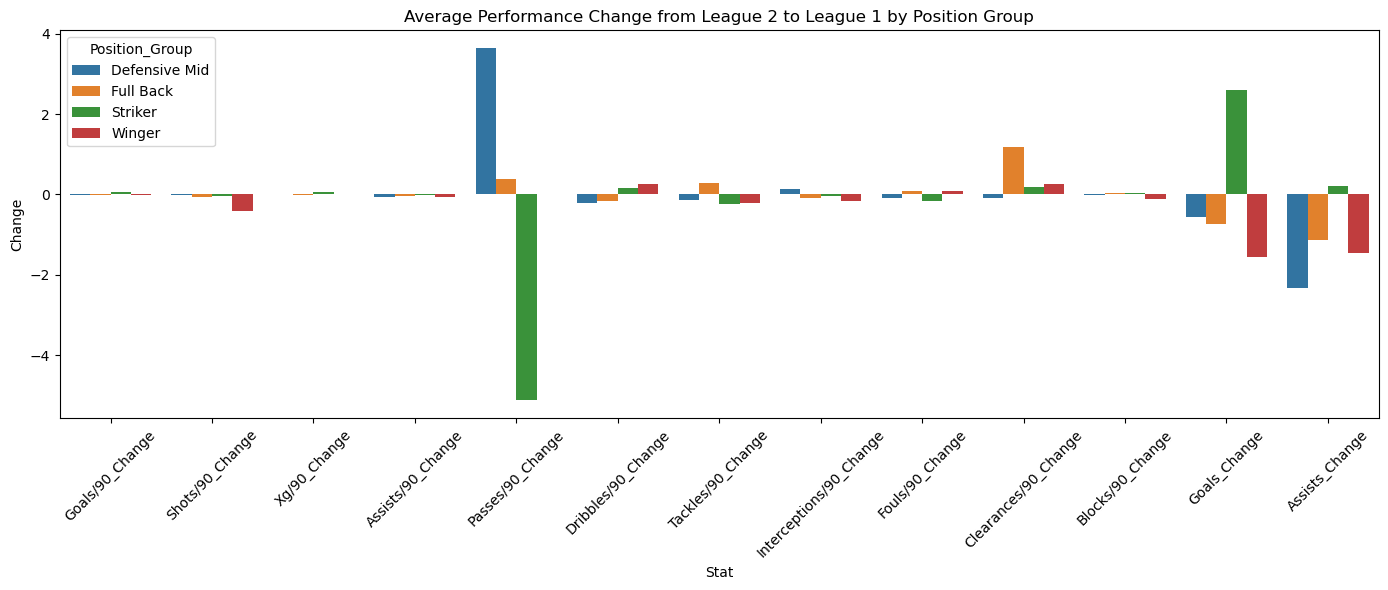

In [29]:
# Melt for plotting
melted = grouped.melt(id_vars='Position_Group', var_name='Stat', value_name='Change')

plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='Stat', y='Change', hue='Position_Group')
plt.xticks(rotation=45)
plt.title("Average Performance Change from League 2 to League 1 by Position Group")
plt.tight_layout()
plt.show()


In [30]:
from scipy.stats import ttest_rel

for col in per90_cols + ['Goals', 'Assists']:
    l2 = df[f"L2_{col.split('_')[-1]}"]
    l1 = df[f"L1_{col.split('_')[-1]}"]
    stat, p = ttest_rel(l1, l2)
    print(f"{col} — t-stat: {stat:.2f}, p-value: {p:.4f}")


L2_Goals/90 — t-stat: 0.20, p-value: 0.8433
L2_Shots/90 — t-stat: -2.25, p-value: 0.0289
L2_Xg/90 — t-stat: 0.87, p-value: 0.3869
L2_Assists/90 — t-stat: -3.20, p-value: 0.0024
L2_Passes/90 — t-stat: -0.18, p-value: 0.8574
L2_Key_Passes/90 — t-stat: -0.18, p-value: 0.8574
L2_Dribbles/90 — t-stat: -0.46, p-value: 0.6494
L2_Tackles/90 — t-stat: 0.29, p-value: 0.7697
L2_Interceptions/90 — t-stat: -0.82, p-value: 0.4173
L2_Fouls/90 — t-stat: 0.01, p-value: 0.9922
L2_Clearances/90 — t-stat: 3.62, p-value: 0.0007
L2_Blocks/90 — t-stat: 0.02, p-value: 0.9822
L1_Goals/90 — t-stat: 0.20, p-value: 0.8433
L1_Shots/90 — t-stat: -2.25, p-value: 0.0289
L1_Xg/90 — t-stat: 0.87, p-value: 0.3869
L1_Assists/90 — t-stat: -3.20, p-value: 0.0024
L1_Passes/90 — t-stat: -0.18, p-value: 0.8574
L1_Key_Passes/90 — t-stat: -0.18, p-value: 0.8574
L1_Dribbles/90 — t-stat: -0.46, p-value: 0.6494
L1_Tackles/90 — t-stat: 0.29, p-value: 0.7697
L1_Interceptions/90 — t-stat: -0.82, p-value: 0.4173
L1_Fouls/90 — t-stat: 

In [31]:
import pandas as pd

# Load your datasets
df = pd.read_csv('League2_to_League1_Players.csv')
scouting_df = pd.read_csv('Player_Scouting.csv')

# Clean whitespace from 'League' column to avoid missing players
scouting_df['League'] = scouting_df['League'].str.strip()

# Filter scouting dataset to only League Two players
scouting_df = scouting_df[scouting_df['League'] == 'League two']

# Map detailed positions to position groups
def map_position(pos):
    if pos in ['CB', 'LB', 'RB']:
        return 'Full back'
    elif pos in ['LW', 'RW']:
        return 'Winger'
    elif pos == 'ST':
        return 'ST'
    elif pos == 'DM':
        return 'DM'
    else:
        return 'Other'

df['Position_Group'] = df['Position'].apply(map_position)
scouting_df['Position_Group'] = scouting_df['Position'].apply(map_position)

# Columns to calculate changes on
change_cols = [
    'Goals', 'Assists', 'Shots/90', 'Xg/90', 'Passes/90', 'Key_Passes/90',
    'Pass_Accuracy%', 'Dribbles/90', 'Tackles/90', 'Interceptions/90',
    'Fouls/90', 'Clearances/90', 'Blocks/90'
]

# Calculate per-player changes from League 2 to League 1 in df
for col in change_cols:
    df[f'{col}_Change'] = df[f'L1_{col}'] - df[f'L2_{col}']

# Calculate rating change
df['Rating_Change'] = df['L1_Rating'] - df['L2_Rating']

# Group changes by position group (average change per stat)
grouped_changes = df.groupby('Position_Group')[[f'{col}_Change' for col in change_cols] + ['Rating_Change']].mean()

# Rename scouting dataset columns to match those in changes (for merging/applying)
scouting_df.rename(columns={
    'Shots_Per_Game': 'Shots/90',
    'Xg/90': 'Xg/90',
    'Avg_Passes': 'Passes/90',
    'Key_Passes': 'Key_Passes/90',
    'Pass_Percentage': 'Pass_Accuracy%',
    'Dribbles': 'Dribbles/90',
    'Tackles': 'Tackles/90',
    'Interceptions': 'Interceptions/90',
    'Fouls': 'Fouls/90',
    'Clearances': 'Clearances/90',
    'Blocks': 'Blocks/90'
}, inplace=True)

# Function to apply the projection based on average changes by position group
def apply_projection(row):
    group = row['Position_Group']
    
    # Mapping from original stat to output projected column name
    col_mapping = {
        'Goals': 'Projected_L1_Goals',
        'Assists': 'Projected_L1_Assists',
        'Shots/90': 'Projected_L1_Shots_Per_Game',
        'Xg/90': 'Projected_L1_Xg_Per_Game',
        'Passes/90': 'Projected_L1_Passes_Per_Game',
        'Key_Passes/90': 'Projected_L1_Key_Passes',
        'Pass_Accuracy%': 'Projected_L1_Pass_Percentage',
        'Dribbles/90': 'Projected_L1_Dribbles',
        'Tackles/90': 'Projected_L1_Tackles',
        'Interceptions/90': 'Projected_L1_Interceptions',
        'Fouls/90': 'Projected_L1_Fouls',
        'Clearances/90': 'Projected_L1_Clearances',
        'Blocks/90': 'Projected_L1_Blocks'
    }
    
    if group in grouped_changes.index:
        for col in change_cols:
            avg_change = grouped_changes.at[group, f'{col}_Change']
            base_val = row.get(col)
            proj_col = col_mapping[col]
            if pd.notnull(base_val):
                row[proj_col] = base_val + avg_change
            else:
                row[proj_col] = None
                
        # Project Rating similarly
        rating_change = grouped_changes.at[group, 'Rating_Change']
        if pd.notnull(row.get('Rating')) and pd.notnull(rating_change):
            row['Projected_L1_Rating'] = row['Rating'] + rating_change
        else:
            row['Projected_L1_Rating'] = None
    else:
        # Position group not found, set projections to None
        for col in change_cols:
            proj_col = col_mapping[col]
            row[proj_col] = None
        row['Projected_L1_Rating'] = None
        
    return row

# Apply projection function to scouting dataframe
scouting_df = scouting_df.apply(apply_projection, axis=1)

# Select columns to display
output_columns = [
    'Name', 'Age', 'Position', 'Mins', 'Goals', 'Assists', 'Rating',
    'Projected_L1_Rating',
    'Projected_L1_Goals', 'Projected_L1_Assists', 'Projected_L1_Shots_Per_Game',
    'Projected_L1_Xg_Per_Game', 'Projected_L1_Passes_Per_Game', 'Projected_L1_Key_Passes',
    'Projected_L1_Pass_Percentage', 'Projected_L1_Dribbles', 'Projected_L1_Tackles',
    'Projected_L1_Interceptions', 'Projected_L1_Fouls', 'Projected_L1_Clearances',
    'Projected_L1_Blocks'
]

# Filter output columns in case any are missing
output_columns = [col for col in output_columns if col in scouting_df.columns]

# Show the projected scouting data sorted by projected goals (descending)
print(scouting_df[output_columns].sort_values(by='Projected_L1_Goals', ascending=False).head(20))


               Name  Age Position  Mins  Goals  Assists  Rating  \
23   Alassana Jatta   26       ST  3434     19        4    7.05   
12      Nathan Lowe   19       ST  1827     15        5    6.40   
9   Hakeem Adelakun   28       RW  2180     13        3    7.07   
18   Josh Neufville   25       RW  4064      5        5    6.95   
0      Joseph Olowu   25       CB  2490      3        2    7.10   
17    Dean Campbell   24       DM  2608      1        0    7.05   
1     Rhys Williams   24       CB  2756      1        0    6.50   
19  Jordan Turnbull   30       CB  3923      1        1    6.99   
2      Nathan Smith   28       CB  1881      0        1    7.04   
3      Ryan Johnson   28       CB  3280      0        1    7.13   
7     Tyrese Fornah   25       CM  3496      1        4    6.67   

    Projected_L1_Rating  Projected_L1_Goals  Projected_L1_Assists  \
23             7.075000           21.600000              4.200000   
12             6.425000           17.600000              

In [32]:
# Display as a clean table in a notebook
from IPython.display import display

display(scouting_df[output_columns].sort_values(by='Projected_L1_Goals', ascending=False).head(20))

,Name,Age,Position,Mins,Goals,Assists,Rating,Projected_L1_Rating,Projected_L1_Goals,Projected_L1_Assists,Projected_L1_Shots_Per_Game,Projected_L1_Xg_Per_Game,Projected_L1_Passes_Per_Game,Projected_L1_Key_Passes,Projected_L1_Pass_Percentage,Projected_L1_Dribbles,Projected_L1_Tackles,Projected_L1_Interceptions,Projected_L1_Fouls,Projected_L1_Clearances,Projected_L1_Blocks
23,Alassana Jatta,26,ST,3434,19,4,7.05,7.075000,21.600000,4.200000,1.835000,0.554000,8.772000,0.553000,80.954000,1.452000,0.451000,0.097000,1.145000,1.232000,0.184000
12,Nathan Lowe,19,ST,1827,15,5,6.40,6.425000,17.600000,5.200000,2.875000,0.344000,3.942000,NaN,67.984000,0.572000,0.601000,0.167000,1.105000,NaN,0.254000
9,Hakeem Adelakun,28,RW,2180,13,3,7.07,7.128889,11.444444,1.555556,1.393333,0.515556,23.680000,0.917778,82.690000,3.820000,0.214444,0.051111,1.202222,1.111111,0.053333
18,Josh Neufville,25,RW,4064,5,5,6.95,7.008889,3.444444,3.555556,0.053333,0.105556,21.590000,0.677778,78.400000,2.070000,1.404444,0.561111,0.772222,2.151111,-0.046667
0,Joseph Olowu,25,CB,2490,3,2,7.10,6.945652,2.260870,0.869565,0.714783,0.124783,39.873913,0.131304,82.064783,0.294348,1.820870,1.341739,1.013913,8.320435,0.593043
17,Dean Campbell,24,DM,2608,1,0,7.05,6.766667,0.444444,-2.333333,0.532222,0.086667,54.092222,-0.016667,90.728889,0.214444,1.938889,1.817778,1.014444,1.560000,0.347778
1,Rhys Williams,24,CB,2756,1,0,6.50,6.345652,0.260870,-1.130435,0.264783,0.024783,23.333913,0.031304,64.734783,-0.055652,0.820870,0.691739,1.183913,7.030435,0.573043
19,Jordan Turnbull,30,CB,3923,1,1,6.99,6.835652,0.260870,-0.130435,0.184783,0.014783,36.123913,0.021304,76.564783,-0.085652,1.810870,1.481739,1.013913,8.140435,0.593043
2,Nathan Smith,28,CB,1881,0,1,7.04,6.885652,-0.739130,-0.130435,0.264783,0.014783,32.323913,0.221304,82.434783,-0.055652,1.240870,0.871739,0.793913,9.950435,0.943043
3,Ryan Johnson,28,CB,3280,0,1,7.13,6.975652,-0.739130,-0.130435,0.554783,0.014783,42.053913,0.121304,68.714783,0.254348,1.850870,1.151739,0.953913,8.920435,0.553043
